<h1>CS4618: Artificial Intelligence I</h1>
<h1>Gradient Descent</h1>
<h2>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h2>

<h1>Initialization</h1>
$\newcommand{\Set}[1]{\{#1\}}$ 
$\newcommand{\Tuple}[1]{\langle#1\rangle}$ 
$\newcommand{\v}[1]{\pmb{#1}}$ 
$\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ 
$\newcommand{\rv}[1]{[#1]}$ 
$\DeclareMathOperator{\argmax}{arg\,max}$ 
$\DeclareMathOperator{\argmin}{arg\,min}$ 
$\DeclareMathOperator{\dist}{dist}$
$\DeclareMathOperator{\abs}{abs}$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import add_dummy_feature

from sklearn.linear_model import SGDRegressor

<h1>Acknowledgement</h1>
<ul>
    <li>I based 5 of the diagrams on ones to be found in A. G&eacute;ron: <i>Hands-On Machine Learning with Scikit-Learn, Keras &amp;
        TensorFlow (2nd edn)</i>, O'Reilly, 2019
    </li>
</ul>

<h1>Gradient Descent</h1>
<ul>
    <li><b>Gradient Descent</b> is a generic method for finding optimal solutions to problems that involve
        minimizing a loss function.
    </li>
    <li>It is a <em>search</em> in the model's <b>parameter space</b> for values of the parameters that minimize 
        the loss function.
    </li>
    <li>Conceptually:
        <ul>
            <li>
                 It starts with an initial guess for the values of the parameters.
            </li>
            <li>
                Then repeatedly:
                <ul>
                    <li>It updates the parameter values  &mdash; hopefully to reduce the loss.
                    </li>
                </ul>
            </li>
        </ul>
        <img src="images/fog.jpg" alt="" />
    </li>
    <li>
        Ideally, it keeps doing this until <b>convergence</b> &mdash; changes to the parameter values do not result
        in lower loss.
    </li>
    <li>The key to this algorithm is how to update the parameter values.</li>
</ul>

<h2>The update rule</h2>
<ul>
     <li>To update the parameter values to reduce the loss:
         <ul>
             <li>Compute the gradient vector.
                 <ul>
                     <li>But this points 'uphill' and we want to go 'downhill'.</li>
                     <li>And we want to make 'baby steps' (see later), so we use a <b>learning rate</b>, 
                         $\alpha$, which is between 0 and 1.
                     </li>
                 </ul>
             </li>
             <li>So subtract $\alpha$ times the gradient vector from $\v{\beta}$.</li>
         </ul>
         $$\v{\beta} \gets \v{\beta} - \alpha\nabla_{\v{\beta}}J(\v{X}, \v{y}, \v{\beta})$$
         Or
         $$\v{\beta} \gets \v{\beta} - \frac{\alpha}{m}\v{X}^T(\v{X}\v{\beta} - \v{y})$$
     </li>
     <li>(BTW, this is vectorized. Naive loop implementations are wrong: they lose the
         <em>simultaneous</em> update of the $\v{\beta}_j$.)
     </li>
</ul>

<h2>Gradient descent algorithm</h2>
<ul>
    <li>Pseudocode (in fact, this is for <b>batch gradient descent</b>, see later):
        <ul style="background: lightgrey; list-style: none">
            <li>initialize $\v{\beta}$ randomly
            <li>
                repeat until convergence
                <ul>
                    <li>
                        $\v{\beta} \gets \v{\beta} - \frac{\alpha}{m}\v{X}^T(\v{X}\v{\beta} - \v{y})$
                    </li>
                </ul>
             </li>
        </ul>
    </li>

<h2>Baby steps</h2>
<ul>
    <li>We'll use  an example with a single feature/single parameter $\beta_1$ in order to visualize.</li>
    <li>We update $\beta_1$ gradually, one baby step at a time, unitl the algorithm converges on minimum loss:
        <figure>
            <img src="images/baby_steps1.png" />
        </figure>
    </li>
    <li>The size of the steps is determined by <!--a <b>hyperparameter</b> called--> the learning rate.
    <!--
        <ul>
            <li>(Hyperparamters are explained in CS4619)</li>
        </ul>
       -->
    </li>
    <li>If the learning rate is too small, it will take many updates until convergence:
        <figure>
            <img src="images/baby_steps2.png" />
        </figure>
    </li>
    <li>If the learning rate is too big, the algorithm might jump across the valley &mdash; it may even end up with
        higher loss than before, making the next step bigger.
        <ul>
            <li>This might make the algorithm <b>diverge</b>.
            </li>
        </ul>
        <figure>
            <img src="images/baby_steps3.png" />
        </figure>
    </li>
</ul>

<h2>Why we need to scale for Gradient Descent</h2>
<ul>
    <li>If we are doing OLS regression using the Normal Equation, we do not need to scale the features.
        But if we are doing OLS regression using Gradient Descent, we do need to scale the features.
    </li>
    <li>If features have different ranges, it affects the shape of the 'bowl'.</li>
    <li>E.g. features 1 and 2 have similar ranges of values &mdash; a 'bowl':
        <figure>
            <img src="images/scaled.png" />
        </figure>
        <ul>
            <li>The algorithm goes straight towards the minimum.</li>
        </ul>
    </li>
    <li>E.g. feature 1 has smaller values than feature 2 &mdash; an elongated 'bowl':
        <figure>
            <img src="images/unscaled.png" />
        </figure>
        <ul>
            <li>Since feature 1 has smaller values, it takes a larger change in $\v{\beta}_1$ to affect 
                the loss function, which is why it is elongated.
            </li>
            <li>It takes more steps to get to the minimum &mdash; steeply down but not really towards the
                goal, followed by a long march down a nearly flat valley.
            </li>
            <li>It makes it more difficult to choose a value for the learning rate that avoids diveregence:
                a value that suits one feature may not suit another.
            </li>
        </ul>
    </li>
</ul>

<h2>Variants of Gradient Descent</h2>
<ul>
    <li>There are, in fact, three variants:
        <ul>
            <li>Batch Gradient Descent;</li>
            <li>Stochastic Gradient Descent; and</li>
            <li>Mini-batch Gradient Descent.</li>
        </ul>
    </li>
</ul>

<h1>Batch Gradient Descent</h1>
<ul>
    <li>The pseudocode we saw earlier (repeated here for convenience) is Batch Gradient Descent:
        <ul style="background: lightgrey; list-style: none">
            <li>initialize $\v{\beta}$ randomly
            <li>
                repeat until convergence
                <ul>
                    <li>
                        $\v{\beta} \gets \v{\beta} - \frac{\alpha}{m}\v{X}^T(\v{X}\v{\beta} - \v{y})$
                    </li>
                </ul>
             </li>
        </ul>
    </li>
    <li>Why is it called <em>Batch</em> Gradient Descent?
        <ul>
            <li>The update involves a calculation over the <em>entire</em> training set $\v{X}$
                on every iteration.
            </li>
            <li>This can be slow for large training sets.</li>
        </ul>
    </li>
</ul>

<h2>Batch Gradient Descent in numpy</h2>
<ul>
    <li>For the hell of it, let's implement it ourselves.</li>
    <li>Again for the purposes of this explanation, we will use the entire dataset as our training set.</li>
</ul>

In [4]:
# Loss function for OLS regression (assumes X contains all 1s in its first column)
def J(X, y, beta):
    return np.mean((X.dot(beta) - y) ** 2) / 2.0

In [5]:
def batch_gradient_descent_for_ols_linear_regression(X, y, alpha, num_iterations):
    
    m, n = X.shape
    beta = np.random.randn(n) 
    Jvals = np.zeros(num_iterations)
    
    for iter in range(num_iterations):
        beta -= (1.0 * alpha / m) * X.T.dot(X.dot(beta) - y)
        Jvals[iter] = J(X, y, beta)
 
    return beta, Jvals

In [6]:
# Use pandas to read the CSV file
df = pd.read_csv("../datasets/dataset_corkA.csv")

In [7]:
# Get the feature-values and the target values 
X = df[["flarea", "bdrms", "bthrms"]].values
y = df["price"].values

# Scale it
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add the extra column to X
X = add_dummy_feature(X)

In [8]:
# Run the Batch Gradient Descent
beta, Jvals = batch_gradient_descent_for_ols_linear_regression(X, y, alpha = 0.03, num_iterations = 500)

# Display beta
beta

array([352.29732897, 175.20819504,   0.35503878,   1.46074231])

<ul>
    <li>Bear in mind that the coefficients it finds are on the scaled data.</li>
</ul>

<ul>
    <li>It's a good idea to plot the values of the loss function against the number of iterations.
    </li>
    <li>For OLS regression done using Batch Gradient Descent, if the loss ever increases, then:
        <ul>
            <li>
                the code might be incorrect; or
            </li>
            <li>
                the value of $\alpha$ is too big and is causing divergence.
            </li>
        </ul>
    </li>
</ul>

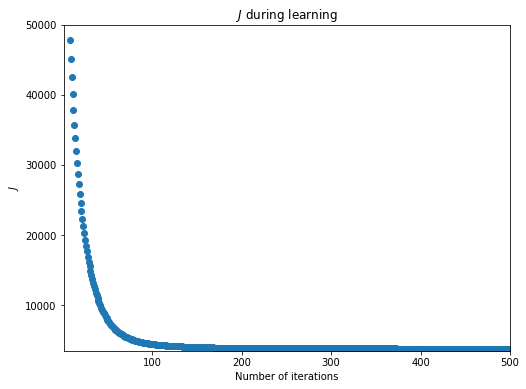

In [9]:
fig = plt.figure(figsize=(8,6))
plt.title("$J$ during learning")
plt.xlabel("Number of iterations")
plt.xlim(1, Jvals.size)
plt.ylabel("$J$")
plt.ylim(3500, 50000)
xvals = np.linspace(1, Jvals.size, Jvals.size)
plt.scatter(xvals, Jvals)
plt.show()

<ul>
    <li>The algorithm gives us the problem of choosing the number of iterations.</li>
    <li>An alternative is to use a very large number of iterations but exit when the gradient vector
        becomes tiny:
        <ul>
            <li>when its norm becomes smaller than <b>tolerance</b>, $\eta$.</li>
        </ul>
    </li>
</ul>

<ul>
    <li>Here's an interactive version that allows you to choose the value of $\alpha$ and to decide
        whether to scale the data or not.
    </li>
</ul>

In [11]:
def bgd(scale=True, alpha=0.03):
    # Get the feature-values and the target values 
    X = df[["flarea", "bdrms", "bthrms"]].values
    y = df["price"].values
    # Scale the data, if requested
    if scale:
        X = StandardScaler().fit_transform(X)
    # Add the extra column to X
    X = add_dummy_feature(X)
    # Run the Batch Gradient Descent
    beta, Jvals = batch_gradient_descent_for_ols_linear_regression(X, y, alpha, num_iterations = 3000)
    # Display beta
    print("beta: ", beta)
    # Plot loss
    fig = plt.figure(figsize=(8,6))
    plt.title("$J$ during learning")
    plt.xlabel("Number of iterations")
    plt.xlim(1, Jvals.size)
    plt.ylabel("$J$")
    plt.ylim(3500, 50000)
    xvals = np.linspace(1, Jvals.size, Jvals.size)
    plt.scatter(xvals, Jvals)
    plt.show()
    
interactive_plot = interactive(bgd, {'manual': True}, 
    scale=True, alpha=[("0.00009", 0.00009), ("0.0009", 0.0009), ("0.009", 0.009), ("0.09", 0.09), ("0.9", 0.9)]) 
interactive_plot

interactive(children=(Checkbox(value=True, description='scale'), Dropdown(description='alpha', options=(('0.00…

<ul>
    <li>
        Some people suggest a variant of Batch Gradient Descent in which the value of $\alpha$ is decreased
        over time, i.e. its value in later iterations is smaller
        <ul>
            <li>Why do they suggest this? </li>
            <li>And why isn't it necessary?
            </li>
        </ul>
    </li>
    <li>(But, we'll revisit this idea in Stochastic Gradient Descent.)</li>
</ul>

<h1>Stochastic Gradient Descent</h1>
<ul>
    <li>As we saw, in each iteration, Batch Gradient Descent does a calculation on the entire
        training set, which, for large training sets, may be slow.
    </li>
    <li><b>Stochastic Gradient Descent (SGD)</b>:
        <ul>
            <li>On each iteration, it picks just <em>one</em> training example $\v{x}$ at random and computes 
                the gradients on just that
                one example
                $$\v{\beta} \gets \v{\beta} - \alpha\v{x}^T(\v{x}\v{\beta} - \v{y})$$
            </li>
        </ul>
    </li>
    <li>This gives huge speed-up.</li>
    <li>It enables us to train on huge training sets since only one example needs to be in memory in each iteration.
    </li>
    <li>But, because it is stochastic (the randomness), the loss will not necessarily decrease on each iteration:
        <ul>
            <li><em>On average</em>, the loss decreases, but in any one iteration, loss may go up or down.</li>
            <li>Eventually, it will get close to the minimum, but it will continue to go up and down a bit.
                <ul>
                    <li>So, once you stop it, the $\v{\beta}$ will be close to the best, but not 
                        necessarily optimal.
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

<h2>SGD in scikit-learn</h2>
<ul>
    <li>The <code>fit</code> method of scikit-learn's <code>SGDRegressor</code> class is doing
        what we have described:
        <ul>
            <li>You must scale the features but it inserts the extra column of 1s for us.</li>
            <li>You can supply a <code>learning_rate</code> and lots of other things
                (in the code below, we'll just use the defaults).
            </li>
        </ul>
    </li>
    <li>(Again, we'll train on the whole dataset.)</li>
</ul>

In [84]:
# Get the feature-values and the target values 
X = df[["flarea", "bdrms", "bthrms"]].values
y = df["price"].values

# Scale it
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create the SGDRegressor and fit the model
sgd = SGDRegressor()
sgd.fit(X, y)

SGDRegressor()

<h2>SGD in numpy</h2>
<ul>
    <li>For the hell of it, let's implement a simple version ourselves</li>
    <li>(Again, we'll train on the whole dataset.)</li>
</ul>

In [85]:
def stochastic_gradient_descent_for_ols_linear_regression(X, y, alpha, num_epochs):
    
    m, n = X.shape
    beta = np.random.randn(n) 
    Jvals = np.zeros(num_epochs * m)
    
    for epoch in range(num_epochs):
        for i in range(m):
            rand_idx = np.random.randint(m)
            xi = X[rand_idx:rand_idx + 1]
            yi = y[rand_idx:rand_idx + 1]
            beta -= alpha * xi.T.dot(xi.dot(beta) - yi)
            Jvals[epoch * m + i] = J(X, y, beta)
 
    return beta, Jvals

<ul>
    <li>(One common alternative to the code above is to shuffle between epochs and remove the randomness within the
        inner loop.)
    </li>
</ul>

In [86]:
# Get the feature-values and the target values 
X = df[["flarea", "bdrms", "bthrms"]].values
y = df["price"].values

# Scale it
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add the extra column to X
X = add_dummy_feature(X)

In [87]:
# Run the Stochastic Gradient Descent
beta, Jvals = stochastic_gradient_descent_for_ols_linear_regression(X, y, alpha = 0.03, num_epochs = 50)

# Display beta
beta

array([344.02655246, 187.82981714, -12.5300742 ,  -7.30668866])

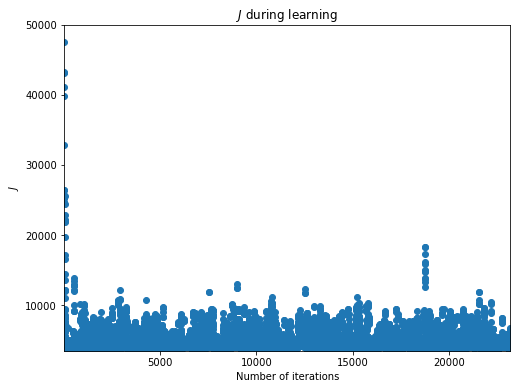

In [88]:
fig = plt.figure(figsize=(8,6))
plt.title("$J$ during learning")
plt.xlabel("Number of iterations")
plt.xlim(1, Jvals.size)
plt.ylabel("$J$")
plt.ylim(3500, 50000)
xvals = np.linspace(1, Jvals.size, Jvals.size)
plt.scatter(xvals, Jvals)
plt.show()

<ul>
    <li>Quite a bumpy ride!</li>
    <li>So, let's try <b>simulated annealing</b>.</li>
</ul>

<h2>Simulated Annealing</h2>
<ul>
    <li>As we discussed, SGD does not settle at the minimum.</li>
    <li>One solution is to gradually reduce the learning rate:
        <ul>
            <li>Updates start out 'large' so you make progress.</li>
            <li>But, over time, updates get smaller, allowing SGD to settle at or near the global minimum.</li>
        </ul>
    </li>
    <li>The function that determines how to reduce the learning rate is called the <b>learning schedule</b>.
        <ul>
            <li>Reduce it too quickly and you may not converge on or near to the global minimum.</li>
            <li>Reduce it too slowly and you may still bounce around a lot and, if stopped after too few iterations, 
                may end up
                with a suboptimal solution.
            </li>
        </ul>
    </li>
</ul>

In [89]:
def learning_schedule(t):
    return 5 / (t + 50)
    
def stochastic_gradient_descent_for_ols_linear_regression_with_simulated_annealing(X, y, num_epochs):
    
    m, n = X.shape
    beta = np.random.randn(n) 
    Jvals = np.zeros(num_epochs * m)
    
    for epoch in range(num_epochs):
        for i in range(m):
            rand_idx = np.random.randint(m)
            xi = X[rand_idx:rand_idx + 1]
            yi = y[rand_idx:rand_idx + 1]
            alpha = learning_schedule(epoch * m + i)
            beta -= alpha * xi.T.dot(xi.dot(beta) - yi)
            Jvals[epoch * m + i] = J(X, y, beta)
 
    return beta, Jvals

In [90]:
# Run the Stochastic Gradient Descent
beta, Jvals = stochastic_gradient_descent_for_ols_linear_regression_with_simulated_annealing(X, y, num_epochs = 50)

# Display beta
beta

array([350.85798617, 175.92858728,  -2.2216496 ,  -1.22026818])

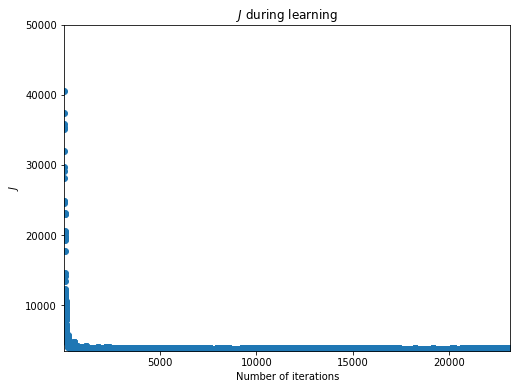

In [91]:
fig = plt.figure(figsize=(8,6))
plt.title("$J$ during learning")
plt.xlabel("Number of iterations")
plt.xlim(1, Jvals.size)
plt.ylabel("$J$")
plt.ylim(3500, 50000)
xvals = np.linspace(1, Jvals.size, Jvals.size)
plt.scatter(xvals, Jvals)
plt.show()

<h1>Mini-Batch Gradient Descent</h1>
<ul>
    <li>Batch Gradient Descent computes gradients from the full training set.</li>
    <li>Stochastic Gradient Descent computes gradients from just one example.</li>
    <li>Mini-Batch Gradient Descent lies between the two:
        <ul>
            <li>It computes gradients from a small randomly-selected subset of the training set, called a
                <b>mini-batch</b>.
            </li>
        </ul>
    </li>
    <li>Since it lies between the two:
        <ul>
            <li>It may bounce less and get closer to the global minimum than SGD&hellip;
                <ul>
                    <li>&hellip;although both of them can reach the global minimum with a good learning schedule.</li>
                </ul>
            </li>
            <li>Its time and memory costs lie between the two.</li>
        </ul>
    </li>
</ul>

<h1>The Normal Equation versus Gradient Descent</h1>
<ul>
    <li>Efficiency/scaling-up to large training sets:
        <ul>
            <li>Normal Equation: 
                <ul>
                    <li>is linear in $m$, so can handle large training sets efficiently if they fit into
                        main memory;
                    </li>
                    <li>but it has to compute the inverse (or psueudo-inverse) of a $n \times n$ matrix, which takes
                        time between quadratic and cubic in $n$, and so is only feasible for smallish $n$ (up to
                        a few thousand).
                    </li>
                </ul>
            </li>
            <li>Gradient Descent:
                <ul>
                    <li>SGD scales really well to huge $m$;</li>
                    <li>All three Gradient Descent methods can handle huge $n$ (even 100s of 1000s).</li>
                </ul>
            </li>
        </ul>
    </li>
    <li>Finding the global minimum for OLS regression:
        <ul>
            <li>Normal Equation: guaranteed to find the global minimum.</li>
            <li>Gradient Descent: all a bit dependent on number of iterations, learning rate, learning schedule.</li>
        </ul>
    </li>
    <li>Feature scaling:
        <ul>
            <li>Normal Equation: scaling is not needed. 
            </li>
            <li>Gradient Descent: scaling <em>is</em> needed.</li>
        </ul>
    </li>
    <li>Finally, Gradient Descent is a general method, whereas the Normal Equation is only for OLS regression.</li>
</ul>

<h1>Non-Convex Functions</h1>
<ul>
    <li>The loss function for OLS regression is convex and it has a slope that never changes abruptly.
        <ul>
            <li>This gives us good 'guarantees' about reaching the minimum
                (depending on such things as running for long enough, using a learning rate that isn't too high,
                and whether we are using Batch, Mini-Batch or Stochastic Gradient Descent).
            </li>
        </ul>
    </li>
    <li>But Gradient Descent is a generic method: you can use it to find the minima of other loss functions.</li>
    <li>But not all loss functions are convex, which can cause problems for Gradient Descent:
        <figure>
            <img src="images/local_minima.png" />
        </figure>
        <ul>
            <li>The algorithm might converge to a local minimum, instead of the global minimum.</li>
            <li>It may take a long time to cross a plateau.</li>
        </ul>
    </li>
    <li>What do we do about this?
        <ul>
            <li>One thing is to prefer Stochastic Gradient Descent (or Mini-Batch Gradient Descent):
                because of the way they 'bounce around', they might even escape a
                local minimum, and might even get to the global minimum.
            </li>
            <li>In this context, simulated annealing is also useful: updates start out 'large' allowing these
                algorithms to make 
                progress and even escape local minima; but, over time, updates get smaller, allowing 
                these algorithms to settle at or near the global minimum.
            </li>
            <li>But, if using simulated annealing, if you reduce the learning rate too quickly, you may 
                stil get stuck in a local minimum.
            </li>
        </ul>
    </li>
</ul>